# Advanced Machine Learning I: Project
Smart Predictive Maintenance for Industrial Equipment

---

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## **Step 1: Problem Definition and Dataset Exploration**

[NASA Turbofan Jet Engine Dataset](https://www.kaggle.com/datasets/behrad3d/nasa-cmaps/data)

### Data Loading

In [ ]:
%pip install --upgrade kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("behrad3d/nasa-cmaps")

print("Path to dataset files:", path)

100%|██████████| 12.3M/12.3M [00:00<00:00, 14.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/behrad3d/nasa-cmaps/versions/1


In [ ]:
%ls /root/.cache/kagglehub/datasets/behrad3d/nasa-cmaps/versions/1

CMaps/


In [ ]:
%ls /root/.cache/kagglehub/datasets/behrad3d/nasa-cmaps/versions/1/CMaps

'Damage Propagation Modeling.pdf'   RUL_FD003.txt    test_FD003.txt    train_FD003.txt
 readme.txt                         RUL_FD004.txt    test_FD004.txt    train_FD004.txt
 RUL_FD001.txt                      test_FD001.txt   train_FD001.txt   x.txt
 RUL_FD002.txt                      test_FD002.txt   train_FD002.txt


### Understanding the Dataset

In [ ]:
%cat /root/.cache/kagglehub/datasets/behrad3d/nasa-cmaps/versions/1/CMaps/readme.txt

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)



Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine � i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. Th

In [ ]:
# Create the headers
headers = ["unit_number", "time_in_cycles"]
for i in range(1, 4):
    headers.append(f"operational_setting_{i}")
for i in range(1, 27):
    headers.append(f"sensor_measurement_{i}")

headers

['unit_number',
 'time_in_cycles',
 'operational_setting_1',
 'operational_setting_2',
 'operational_setting_3',
 'sensor_measurement_1',
 'sensor_measurement_2',
 'sensor_measurement_3',
 'sensor_measurement_4',
 'sensor_measurement_5',
 'sensor_measurement_6',
 'sensor_measurement_7',
 'sensor_measurement_8',
 'sensor_measurement_9',
 'sensor_measurement_10',
 'sensor_measurement_11',
 'sensor_measurement_12',
 'sensor_measurement_13',
 'sensor_measurement_14',
 'sensor_measurement_15',
 'sensor_measurement_16',
 'sensor_measurement_17',
 'sensor_measurement_18',
 'sensor_measurement_19',
 'sensor_measurement_20',
 'sensor_measurement_21',
 'sensor_measurement_22',
 'sensor_measurement_23',
 'sensor_measurement_24',
 'sensor_measurement_25',
 'sensor_measurement_26']

In [ ]:
# Loading the dataset
import pandas as pd

train = pd.read_csv(f"{path}/CMaps/train_FD001.txt", sep="\s+", header=None, names=headers)
train.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = pd.read_csv(f"{path}/CMaps/test_FD001.txt", sep="\s+", header=None, names=headers)
test.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,392,2388,100.0,38.86,23.3735,NaN,NaN,NaN,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,393,2388,100.0,39.02,23.3916,NaN,NaN,NaN,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,393,2388,100.0,39.08,23.4166,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,391,2388,100.0,39.00,23.3737,NaN,NaN,NaN,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,390,2388,100.0,38.99,23.4130,NaN,NaN,NaN,NaN,NaN


In [ ]:
RUL = pd.read_csv(f"{path}/CMaps/RUL_FD001.txt", sep="\s+", header=None, names=["RUL"])
RUL.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [ ]:
# Concatenate 'test' and 'RUL' DataFrames horizontally
test = pd.concat([test, RUL], axis=1)

# Display the combined DataFrame
test.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388,100.0,38.86,23.3735,NaN,NaN,NaN,NaN,NaN,112.0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388,100.0,39.02,23.3916,NaN,NaN,NaN,NaN,NaN,98.0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388,100.0,39.08,23.4166,NaN,NaN,NaN,NaN,NaN,69.0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388,100.0,39.00,23.3737,NaN,NaN,NaN,NaN,NaN,82.0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388,100.0,38.99,23.4130,NaN,NaN,NaN,NaN,NaN,91.0


In [ ]:
# Overview of the dataset
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_measurement_1   20631 non-null  float64
 6   sensor_measurement_2   20631 non-null  float64
 7   sensor_measurement_3   20631 non-null  float64
 8   sensor_measurement_4   20631 non-null  float64
 9   sensor_measurement_5   20631 non-null  float64
 10  sensor_measurement_6   20631 non-null  float64
 11  sensor_measurement_7   20631 non-null  float64
 12  sensor_measurement_8   20631 non-null  float64
 13  sensor_measurement_9   20631 non-null  float64
 14  sensor_measurement_10  20631 non-null  float64
 15  se

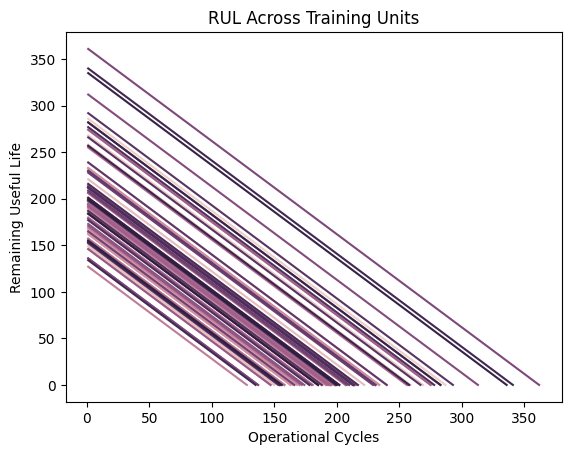

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize RUL
train["RUL"] = train.groupby("unit_number")["time_in_cycles"].transform(max) - train["time_in_cycles"]
sns.lineplot(data=train, x="time_in_cycles", y="RUL", hue="unit_number", legend=False)
plt.title("RUL Across Training Units")
plt.xlabel("Operational Cycles")
plt.ylabel("Remaining Useful Life")
plt.show()

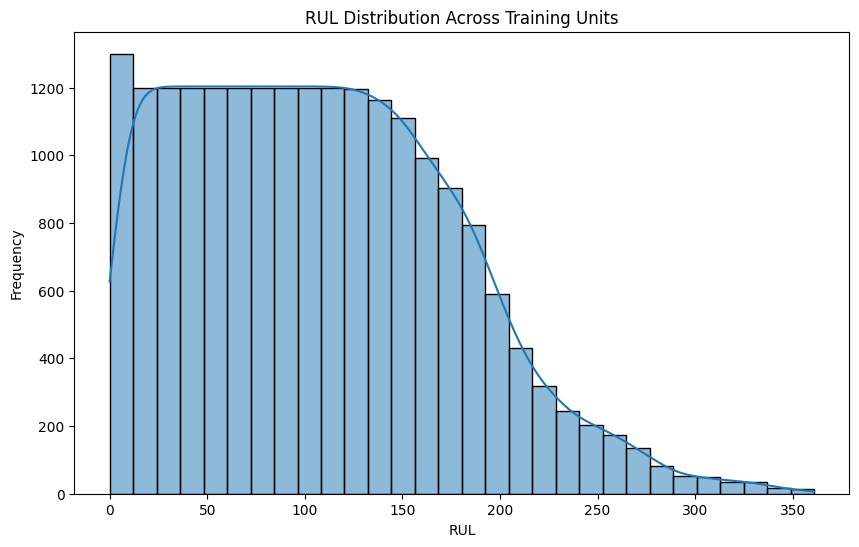

In [ ]:
# Visualize RUL distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['RUL'], kde=True, bins=30)
plt.title('RUL Distribution Across Training Units')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show()

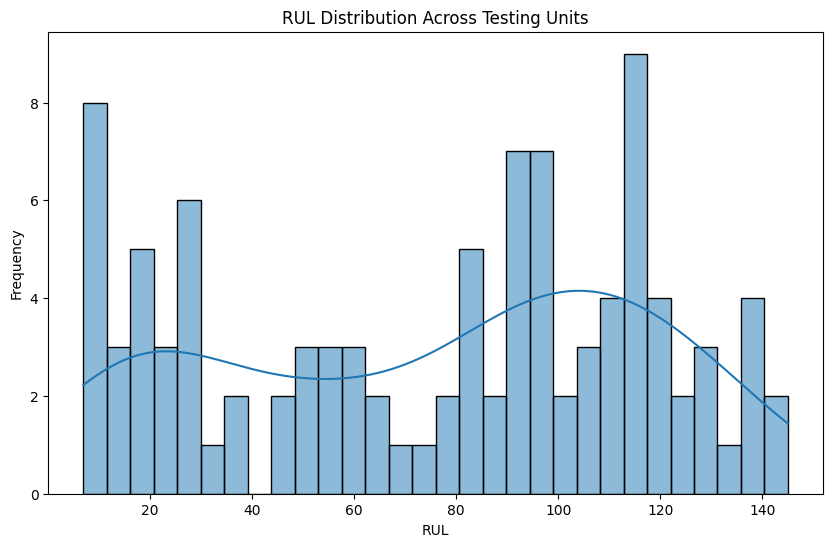

In [ ]:
# Visualize RUL distribution
plt.figure(figsize=(10, 6))
sns.histplot(test['RUL'], kde=True, bins=30)
plt.title('RUL Distribution Across Testing Units')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (20631, 32)
Test shape: (13096, 32)


### Transformation into a Classification Problem

In [ ]:
FAILURE_THRESHOLD = 50

train['failure'] = (train['RUL'] <= FAILURE_THRESHOLD).astype(int)
test['failure'] = (test['RUL'] <= FAILURE_THRESHOLD).astype(int)

The failure threshold was chosen after looking at the distribution of RUL within te training data.\
This value corresponds to around 1/3 of the RUL values before they start to decrease.

In [ ]:
train.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26,RUL,failure
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN,187,0


In [ ]:
train['failure'].value_counts()

,count
failure,
0,15531
1,5100


In [ ]:
test['failure'].value_counts()

,count
failure,
0,13063
1,33


## **Step 2: Preprocessing and Feature Engineering**

In [ ]:
train_scaled = train.copy()
test_scaled = test.copy()

### Scaling Numerical Values

In [ ]:
columns_to_scale = train.columns[2:-2]  # Exclude unit_number and RUL
columns_to_scale

Index(['operational_setting_1', 'operational_setting_2',
       'operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_2',
       'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5',
       'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8',
       'sensor_measurement_9', 'sensor_measurement_10',
       'sensor_measurement_11', 'sensor_measurement_12',
       'sensor_measurement_13', 'sensor_measurement_14',
       'sensor_measurement_15', 'sensor_measurement_16',
       'sensor_measurement_17', 'sensor_measurement_18',
       'sensor_measurement_19', 'sensor_measurement_20',
       'sensor_measurement_21', 'sensor_measurement_22',
       'sensor_measurement_23', 'sensor_measurement_24',
       'sensor_measurement_25', 'sensor_measurement_26'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale operational settings and sensor readings
scaler = MinMaxScaler()

train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])
test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])

### New Features: Rolling Statistics

In [ ]:
# Feature engineering: rolling statistics
for window in [3, 5]:
    for col in columns_to_scale:
        train_scaled[f"{col}_rolling_mean_{window}"] = train_scaled.groupby("unit_number")[col].rolling(window).mean().reset_index(0, drop=True)
        test_scaled[f"{col}_rolling_mean_{window}"] = test_scaled.groupby("unit_number")[col].rolling(window).mean().reset_index(0, drop=True)

### Handling Missing Values

In [ ]:
train_scaled.fillna(0, inplace=True)
test_scaled.fillna(0, inplace=True)

In [ ]:
train_scaled.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_17_rolling_mean_5,sensor_measurement_18_rolling_mean_5,sensor_measurement_19_rolling_mean_5,sensor_measurement_20_rolling_mean_5,sensor_measurement_21_rolling_mean_5,sensor_measurement_22_rolling_mean_5,sensor_measurement_23_rolling_mean_5,sensor_measurement_24_rolling_mean_5,sensor_measurement_25_rolling_mean_5,sensor_measurement_26_rolling_mean_5
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.316667,0.0,0.0,0.634109,0.688788,0.0,0.0,0.0,0.0,0.0


## **Step 3: Applying Ensemble Learning (Bagging and Boosting)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

```python
# Prepare training data
# features = train_scaled.drop(columns=["unit_number", "time_in_cycles", "RUL"])
features = train_scaled.drop(columns=["unit_number", "time_in_cycles", "RUL", "failure"])
# target = train_scaled["RUL"]
target = train_scaled["failure"]
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)
```

In [ ]:
X_train = train_scaled.drop(columns=["unit_number", "time_in_cycles", "RUL", "failure"])
y_train = train_scaled["failure"]
X_val = test_scaled.drop(columns=["unit_number", "time_in_cycles", "RUL", "failure"])
y_val = test_scaled["failure"]

### Random Forest

In [ ]:
# Random Forest Model
rf_clf_model = RandomForestClassifier(random_state=42)
rf_clf_model.fit(X_train, y_train)
rf_clf_preds = rf_clf_model.predict(X_val)

In [ ]:
rf_clf_accuracy = accuracy_score(y_val, rf_clf_preds)
rf_clf_report = classification_report(y_val, rf_clf_preds, output_dict=True)

print(f"Random Forest Accuracy: {rf_clf_accuracy}")
print(f"Random Forest F1-Score: {rf_clf_report['weighted avg']['f1-score']}")
print(f"Random Forest Precision: {rf_clf_report['weighted avg']['precision']}")
print(f"Random Forest Recall: {rf_clf_report['weighted avg']['recall']}")

Random Forest Accuracy: 0.9489920586438607
Random Forest F1-Score: 0.9713746483360565
Random Forest Precision: 0.9948385572638434
Random Forest Recall: 0.9489920586438607


### XGBoost

In [ ]:
# XGBoost Model
xgb_clf_model = XGBClassifier(random_state=42)
xgb_clf_model.fit(X_train, y_train)
xgb_clf_preds = xgb_clf_model.predict(X_val)

In [ ]:
xgb_clf_accuracy = accuracy_score(y_val, xgb_clf_preds)
xgb_clf_report = classification_report(y_val, xgb_clf_preds, output_dict=True)

print(f"XGBoost Accuracy: {xgb_clf_accuracy}")
print(f"XGBoost F1-Score: {xgb_clf_report['weighted avg']['f1-score']}")
print(f"XGBoost Precision: {xgb_clf_report['weighted avg']['precision']}")
print(f"XGBoost Recall: {xgb_clf_report['weighted avg']['recall']}")

XGBoost Accuracy: 0.9467012828344533
XGBoost F1-Score: 0.9701701465181191
XGBoost Precision: 0.9948321822593889
XGBoost Recall: 0.9467012828344533


In [ ]:
from sklearn.metrics import roc_curve, auc
import plotly.express as px

# Function to plot ROC curve for multiple models
def plot_roc_curves(y_test, y_preds, model_labels):
    all_data = []

    for y_pred_prob, label in zip(y_preds, model_labels):
        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Append data for each model
        model_data = pd.DataFrame({
            'False Positive Rate': fpr,
            'True Positive Rate': tpr,
            'Model': f'{label} (AUC = {roc_auc:.2f})'
        })
        all_data.append(model_data)

    # Concatenate all model data
    all_data = pd.concat(all_data, ignore_index=True)

    # Add random guess line
    random_data = pd.DataFrame({
        'False Positive Rate': [0, 1],
        'True Positive Rate': [0, 1],
        'Model': 'Random Guess'
    })
    all_data = pd.concat([all_data, random_data], ignore_index=True)

    # Plot using plotly.express
    fig = px.line(
        all_data,
        x='False Positive Rate',
        y='True Positive Rate',
        color='Model',
        title="ROC Curve Comparison",
        labels={
            'False Positive Rate': 'False Positive Rate',
            'True Positive Rate': 'True Positive Rate',
            'Model': 'Models'
        },
        template="plotly_white"
    )

    fig.show()

In [ ]:
# Example usage (ensure y_test and y_preds are defined)
y_preds = [rf_clf_preds, xgb_clf_preds]  # Example predicted probabilities for each model
model_labels = ["RandomForestClassifier", "XGBoostClassifier"]
plot_roc_curves(y_val, y_preds, model_labels)

## **Step 4: Handling Imbalanced Data**

In [ ]:
y_train.value_counts()

,count
failure,
0,15531
1,5100


### Over-sampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)
X_oversampled, y_oversampled = os.fit_resample(X_train, y_train)

In [ ]:
y_oversampled.value_counts()

,count
failure,
0,15531
1,15531


#### Random Forest Classifier

In [ ]:
rf_clf_model_os = rf_clf_model
rf_clf_model_os.fit(X_oversampled, y_oversampled)
rf_clf_preds_os = rf_clf_model_os.predict(X_val)

In [ ]:
rf_clf_accuracy_os = accuracy_score(y_val, rf_clf_preds_os)
rf_clf_report_os = classification_report(y_val, rf_clf_preds_os, output_dict=True)

print(f"Random Forest (SMOTE) Accuracy: {rf_clf_accuracy_os}")
print(f"Random Forest (SMOTE) F1-Score: {rf_clf_report_os['weighted avg']['f1-score']}")
print(f"Random Forest (SMOTE) Precision: {rf_clf_report_os['weighted avg']['precision']}")
print(f"Random Forest (SMOTE) Recall: {rf_clf_report_os['weighted avg']['recall']}")

Random Forest (SMOTE) Accuracy: 0.9359346365302382
Random Forest (SMOTE) F1-Score: 0.9644708047958429
Random Forest (SMOTE) Precision: 0.9948018028473965
Random Forest (SMOTE) Recall: 0.9359346365302382


#### XGBoost Classifier

In [ ]:
xgb_clf_model_os = xgb_clf_model
xgb_clf_model_os.fit(X_oversampled, y_oversampled)
xgb_clf_preds_os = xgb_clf_model_os.predict(X_val)

In [ ]:
xgb_clf_accuracy_os = accuracy_score(y_val, xgb_clf_preds_os)
xgb_clf_report_os = classification_report(y_val, xgb_clf_preds_os, output_dict=True)

print(f"XGBoost (SMOTE) Accuracy: {xgb_clf_accuracy_os}")
print(f"XGBoost (SMOTE) F1-Score: {xgb_clf_report_os['weighted avg']['f1-score']}")
print(f"XGBoost (SMOTE) Precision: {xgb_clf_report_os['weighted avg']['precision']}")
print(f"XGBoost (SMOTE) Recall: {xgb_clf_report_os['weighted avg']['recall']}")

XGBoost (SMOTE) Accuracy: 0.9431887599266952
XGBoost (SMOTE) F1-Score: 0.9683177279882442
XGBoost (SMOTE) Precision: 0.9948223472686653
XGBoost (SMOTE) Recall: 0.9431887599266952


### Under-sampling of the majority class

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


undersampler = RandomUnderSampler(random_state=42) # Initialize under-sampler
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train) # Apply under-sampling

In [ ]:
y_train_under.value_counts()

,count
failure,
0,5100
1,5100


#### Random Forest

In [ ]:
rf_clf_model_us = rf_clf_model
rf_clf_model_us.fit(X_train_under, y_train_under)
rf_clf_preds_us = rf_clf_model_us.predict(X_val)

In [ ]:
rf_clf_accuracy_us = accuracy_score(y_val, rf_clf_preds_us)
rf_clf_report_us = classification_report(y_val, rf_clf_preds_us, output_dict=True)

print(f"Random Forest (RUS) Accuracy: {rf_clf_accuracy_us}")
print(f"Random Forest (RUS) F1-Score: {rf_clf_report_us['weighted avg']['f1-score']}")
print(f"Random Forest (RUS) Precision: {rf_clf_report_us['weighted avg']['precision']}")
print(f"Random Forest (RUS) Recall: {rf_clf_report_us['weighted avg']['recall']}")

Random Forest (RUS) Accuracy: 0.921731826511912
Random Forest (RUS) F1-Score: 0.9568548376624236
Random Forest (RUS) Precision: 0.9947606452185317
Random Forest (RUS) Recall: 0.921731826511912


#### XGBoost

In [ ]:
xgb_clf_model_us = xgb_clf_model
xgb_clf_model_us.fit(X_train_under, y_train_under)
xgb_clf_preds_us = xgb_clf_model_us.predict(X_val)

In [ ]:
# Train XGBoost on resampled data
xgb_clf_accuracy_us = accuracy_score(y_val, xgb_clf_preds_us)
xgb_clf_report_us = classification_report(y_val, xgb_clf_preds_us, output_dict=True)

print(f"XGBoost (RUS) Accuracy: {xgb_clf_accuracy_us}")
print(f"XGBoost (RUS) F1-Score: {xgb_clf_report_us['weighted avg']['f1-score']}")
print(f"XGBoost (RUS) Precision: {xgb_clf_report_us['weighted avg']['precision']}")
print(f"XGBoost (RUS) Recall: {xgb_clf_report_us['weighted avg']['recall']}")

XGBoost (RUS) Accuracy: 0.9197464874770922
XGBoost (RUS) F1-Score: 0.9557812629500223
XGBoost (RUS) Precision: 0.9947547910178222
XGBoost (RUS) Recall: 0.9197464874770922


### Cost-sensitive learning

#### XGBoost

In XGBoost, the `scale_pos_weight` parameter directly adjusts the weight for the positive class. It is calculated as:

$$
\text{scale_pos_weight}= \frac{\text{Number of Positive Samples}}{\text{Number of Negative Samples}}
$$

In [ ]:
# Calculate scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [ ]:
# Train XGBoost with cost-sensitive learning
xgb_clf_model_cs = XGBClassifier(objective='binary:logistic', scale_pos_weight=scale_pos_weight, random_state=42)
xgb_clf_model_cs.fit(X_train, y_train)

# Predictions
xgb_clf_preds_cs = xgb_clf_model_cs.predict(X_val)

In [ ]:
xgb_clf_accuracy_cs = accuracy_score(y_val, xgb_clf_preds_cs)
xgb_clf_report_cs = classification_report(y_val, xgb_clf_preds_cs, output_dict=True)

print(f"XGBoost (CS) Accuracy: {xgb_clf_accuracy_cs}")
print(f"XGBoost (CS) F1-Score: {xgb_clf_report_cs['weighted avg']['f1-score']}")
print(f"XGBoost (CS) Precision: {xgb_clf_report_cs['weighted avg']['precision']}")
print(f"XGBoost (CS) Recall: {xgb_clf_report_cs['weighted avg']['recall']}")

XGBoost (CS) Accuracy: 0.9385308491142333
XGBoost (CS) F1-Score: 0.9658509065253263
XGBoost (CS) Precision: 0.994809191981437
XGBoost (CS) Recall: 0.9385308491142333


#### Random Forest

In [ ]:
# Train Random Forest with cost-sensitive learning
rf_clf_model_cs = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf_model_cs.fit(X_train, y_train)

# Predictions and evaluation
rf_clf_preds_cs = rf_clf_model_cs.predict(X_val)

In [ ]:
rf_clf_accuracy_cs = accuracy_score(y_val, rf_clf_preds_cs)
rf_clf_report_cs = classification_report(y_val, rf_clf_preds_cs, output_dict=True)

print(f"Random Forest (CS) Accuracy: {rf_clf_accuracy_cs}")
print(f"Random Forest (CS) F1-Score: {rf_clf_report_cs['weighted avg']['f1-score']}")
print(f"Random Forest (CS) Precision: {rf_clf_report_cs['weighted avg']['precision']}")
print(f"Random Forest (CS) Recall: {rf_clf_report_cs['weighted avg']['recall']}")

Random Forest (CS) Accuracy: 0.9504428833231521
Random Forest (CS) F1-Score: 0.9721360360842763
Random Forest (CS) Precision: 0.9948425789142897
Random Forest (CS) Recall: 0.9504428833231521


### Model Performance Re-evaluation

In [ ]:
# prompt: Re-evaluate model performance after handling imbalance, comparing results with the baseline models. Use plotly express and sort values in descending order for each metric subplot

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a dictionary to store the results for each model
results = {
    'Random Forest': {
        'Accuracy': rf_clf_accuracy,
        'F1-Score': rf_clf_report['weighted avg']['f1-score'],
        'Precision': rf_clf_report['weighted avg']['precision'],
        'Recall': rf_clf_report['weighted avg']['recall']
    },
    'XGBoost': {
        'Accuracy': xgb_clf_accuracy,
        'F1-Score': xgb_clf_report['weighted avg']['f1-score'],
        'Precision': xgb_clf_report['weighted avg']['precision'],
        'Recall': xgb_clf_report['weighted avg']['recall']
    },
    'Random Forest (SMOTE)': {
        'Accuracy': rf_clf_accuracy_os,
        'F1-Score': rf_clf_report_os['weighted avg']['f1-score'],
        'Precision': rf_clf_report_os['weighted avg']['precision'],
        'Recall': rf_clf_report_os['weighted avg']['recall']
    },
    'XGBoost (SMOTE)': {
        'Accuracy': xgb_clf_accuracy_os,
        'F1-Score': xgb_clf_report_os['weighted avg']['f1-score'],
        'Precision': xgb_clf_report_os['weighted avg']['precision'],
        'Recall': xgb_clf_report_os['weighted avg']['recall']
    },
    'Random Forest (RUS)': {
        'Accuracy': rf_clf_accuracy_us,
        'F1-Score': rf_clf_report_us['weighted avg']['f1-score'],
        'Precision': rf_clf_report_us['weighted avg']['precision'],
        'Recall': rf_clf_report_us['weighted avg']['recall']
    },
    'XGBoost (RUS)': {
        'Accuracy': xgb_clf_accuracy_us,
        'F1-Score': xgb_clf_report_us['weighted avg']['f1-score'],
        'Precision': xgb_clf_report_us['weighted avg']['precision'],
        'Recall': xgb_clf_report_us['weighted avg']['recall']
    },
    'XGBoost (CS)': {
        'Accuracy': xgb_clf_accuracy_cs,
        'F1-Score': xgb_clf_report_cs['weighted avg']['f1-score'],
        'Precision': xgb_clf_report_cs['weighted avg']['precision'],
        'Recall': xgb_clf_report_cs['weighted avg']['recall']
    },
    'Random Forest (CS)': {
        'Accuracy': rf_clf_accuracy_cs,
        'F1-Score': rf_clf_report_cs['weighted avg']['f1-score'],
        'Precision': rf_clf_report_cs['weighted avg']['precision'],
        'Recall': rf_clf_report_cs['weighted avg']['recall']
    }
}

# Convert the results to a dataframe for easy plotting
results_df = pd.DataFrame(results).T.sort_values(by=['Accuracy', 'F1-Score', 'Precision', 'Recall'], ascending=False)

# Create subplots for each metric
fig = make_subplots(rows=2, cols=2, subplot_titles=('Accuracy', 'F1-Score', 'Precision', 'Recall'))

# Add traces for each metric
for i, metric in enumerate(['Accuracy', 'F1-Score', 'Precision', 'Recall']):
    row = i // 2 + 1
    col = i % 2 + 1
    sorted_df = results_df.sort_values(by=metric, ascending=False)
    fig.add_trace(go.Bar(x=sorted_df.index, y=sorted_df[metric], name=metric), row=row, col=col)

# Update layout
fig.update_layout(height=800, width=1000, title_text="Model Performance Comparison", showlegend=False)
fig.update_xaxes(tickangle=45)

# Show plot
fig.show()

In [ ]:
# Example usage (ensure y_test and y_preds are defined)
y_preds = [rf_clf_preds, xgb_clf_preds, rf_clf_preds_os, xgb_clf_preds_os, rf_clf_preds_us, xgb_clf_preds_us, xgb_clf_preds_cs, rf_clf_preds_cs]
model_labels = ["Random Forest", "XGBoost", "Random Forest (OS)", "XGBoost (OS)", "Random Forest (US)", "XGBoost (US)", "XGBoost (CS)", "Random Forest (CS)"]
plot_roc_curves(y_val, y_preds, model_labels)

## **Step 5: Maintenance Scheduling Using Reinforcement Learning**

I use Q-Learning as the RL algorithm to learn the optimal maintenance scheduling policy.

### Environment Setup

In [ ]:
import numpy as np
import random

# Define the states and actions
states = ["healthy", "moderate_wear", "severe_wear", "failed"]
actions = ["no_maintenance", "maintenance"]

# Rewards: Penalties for failure, cost for maintenance, bonus for healthy operation
rewards = {
    ("healthy", "no_maintenance"): 10,
    ("healthy", "maintenance"): -5,
    ("moderate_wear", "no_maintenance"): -20,
    ("moderate_wear", "maintenance"): -5,
    ("severe_wear", "no_maintenance"): -50,
    ("severe_wear", "maintenance"): -10,
    ("failed", "no_maintenance"): -100,
    ("failed", "maintenance"): -100,
}

# State transition probabilities
transition_probabilities = {
    ("healthy", "no_maintenance"): "moderate_wear",
    ("healthy", "maintenance"): "healthy",
    ("moderate_wear", "no_maintenance"): "severe_wear",
    ("moderate_wear", "maintenance"): "healthy",
    ("severe_wear", "no_maintenance"): "failed",
    ("severe_wear", "maintenance"): "moderate_wear",
    ("failed", "no_maintenance"): "failed",
    ("failed", "maintenance"): "failed",
}

### Q-Learning Algorithm

In [ ]:
# Initialize Q-table
q_table = np.zeros((len(states), len(actions)))

# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration factor
num_episodes = 1000

# State-to-index and action-to-index mappings
state_to_idx = {state: idx for idx, state in enumerate(states)}
action_to_idx = {action: idx for idx, action in enumerate(actions)}

reward_all_episodes = []

# Q-Learning
for episode in range(num_episodes):
    # Start with a healthy engine
    current_state = "healthy"

    reward_current_episode = 0

    for _ in range(20):  # Limit steps per episode
        # Choose an action (epsilon-greedy)
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = actions[np.argmax(q_table[state_to_idx[current_state], :])]

        # Get the next state and reward
        next_state = transition_probabilities[(current_state, action)]
        reward = rewards[(current_state, action)]
        reward_current_episode += reward

        # Update Q-value
        current_q = q_table[state_to_idx[current_state], action_to_idx[action]]
        max_future_q = np.max(q_table[state_to_idx[next_state], :])
        q_table[state_to_idx[current_state], action_to_idx[action]] = current_q + alpha * (
            reward + gamma * max_future_q - current_q
        )

        # Transition to next state
        current_state = next_state

        # If failure state, break
        if current_state == "failed":
            break
    reward_all_episodes.append(reward_current_episode)


# Output the learned Q-table
print("Learned Q-table:")
print(q_table)

Learned Q-table:
[[ 28.94736842  21.05263158]
 [-11.94736842  21.05263158]
 [-49.99477522   8.94736842]
 [  0.           0.        ]]


The Q-table provides the learned value of taking a specific action (`no_maintenance` or `maintenance`) in each state (`healthy`, `moderate_wear`, `severe_wear`, `failed`). Here's what it suggests:

|State|Action: No Maintenance|Action: Maintenance|
|-----|----------------------|-------------------|
|**Healthy**|28.95|21.05|
|**Moderate Wear**|-11.95|21.05|
|**Severe Wear**|-49.99|8.95|
|**Failed**|0.0|0.0|

- **Healthy State**\
  The Q-value for `no_maintenance` is higher (28.95) than for `maintenance` (21.05).\
  This suggests the policy prefers not to perform maintenance in the healthy state, as it avoids unnecessary maintenance costs while earning a reward for continued operation.
- **Moderate Wear State**\
  The Q-value for `maintenance` (21.05) is significantly higher than for `no_maintenance` (-11.95).\
  This indicates that performing maintenance in the moderate wear state is optimal to avoid transitioning to severe wear or failure, which carry significant penalties.
- **Severe Wear**\
  The Q-value for `maintenance` (8.95) is still better than `no_maintenance` (-49.99).\
  However, the values indicate that reaching this state is suboptimal and should generally be avoided through earlier maintenance.
- **Failed State**\
  Both actions have a Q-value of 0, as no action can reverse failure. This emphasizes the importance of proactive maintenance.

### Maintenance Scheduling Simulation

In [ ]:
# Simulate scheduling with the learned policy
def simulate_policy(q_table, initial_state="healthy", steps=20):
    state = initial_state
    total_reward = 0
    for step in range(steps):
        action_idx = np.argmax(q_table[state_to_idx[state], :])
        action = actions[action_idx]
        print(f"Step {step + 1}: State = {state}, Action = {action}")

        # Get reward and transition to next state
        reward = rewards[(state, action)]
        total_reward += reward
        state = transition_probabilities[(state, action)]

        # Stop if failure state
        if state == "failed":
            print(f"Step {step + 1}: System failed!")
            break

    print(f"Total Reward: {total_reward}")

# Run simulation
simulate_policy(q_table)

Step 1: State = healthy, Action = no_maintenance
Step 2: State = moderate_wear, Action = maintenance
Step 3: State = healthy, Action = no_maintenance
Step 4: State = moderate_wear, Action = maintenance
Step 5: State = healthy, Action = no_maintenance
Step 6: State = moderate_wear, Action = maintenance
Step 7: State = healthy, Action = no_maintenance
Step 8: State = moderate_wear, Action = maintenance
Step 9: State = healthy, Action = no_maintenance
Step 10: State = moderate_wear, Action = maintenance
Step 11: State = healthy, Action = no_maintenance
Step 12: State = moderate_wear, Action = maintenance
Step 13: State = healthy, Action = no_maintenance
Step 14: State = moderate_wear, Action = maintenance
Step 15: State = healthy, Action = no_maintenance
Step 16: State = moderate_wear, Action = maintenance
Step 17: State = healthy, Action = no_maintenance
Step 18: State = moderate_wear, Action = maintenance
Step 19: State = healthy, Action = no_maintenance
Step 20: State = moderate_wear, 

The simulation alternates between:
- `no_maintenance` in the healthy state to capitalize on the reward for continued operation.
- `maintenance` in the moderate wear state to reset the engine's health and prevent further degradation.

\
The **total reward** of 50 indicates that the policy effectively balances maintenance costs and operation rewards over 20 steps.

### **Insights from the Policy**

1. **Proactive Maintenance**:
  - The policy correctly learns to perform maintenance in the **moderate wear state** to prevent transitioning to severe wear or failure. This reflects effective maintenance scheduling.

2. **Cost-Avoidance Strategy**:
  - Maintenance is avoided in the **healthy state**, reducing unnecessary costs and maximizing operational rewards.

3. **Failure Prevention**:
  - The learned policy actively avoids the **severe wear** and **failed** states, minimizing downtime and penalties associated with system failure.

4. **Optimal Maintenance Cycle**:
  - The simulation reveals an **alternating cycle** where:
    - `no_maintenance` is applied in the healthy state.
    - `maintenance` is performed in the moderate wear state.
  - This cyclic behavior suggests an efficient maintenance schedule for minimizing costs while maximizing uptime.

## **Step 6: Model Selection and Hyperparameter Tuning with AutoML**

### Model Selection & Hyper-Parameter Tuning Automation

In [ ]:
%pip install tpot

In [ ]:
from tpot import TPOTClassifier

#### Default data

In [ ]:
# TPOT AutoML for RUL Prediction
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print("Best Pipeline:", tpot.fitted_pipeline_)
tpot_preds = tpot.predict(X_val)

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9342244145848702

Generation 2 - Current best internal CV score: 0.9342244145848702

Generation 3 - Current best internal CV score: 0.9342244145848702

Generation 4 - Current best internal CV score: 0.9342244145848702

Generation 5 - Current best internal CV score: 0.9343213842704504

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=69, p=1, weights=distance)
Best Pipeline: Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=69, p=1,
                                      weights='distance'))])


In [ ]:
from sklearn.metrics import roc_auc_score

print("TPOT AUC-ROC:", roc_auc_score(y_val, tpot.predict_proba(X_val)[:, 1]))

TPOT AUC-ROC: 0.47297479116356866


In [ ]:
tpot_accuracy = accuracy_score(y_val, tpot_preds)
tpot_report = classification_report(y_val, tpot_preds, output_dict=True)

print(f"TPOT Accuracy: {tpot_accuracy}")
print(f"TPOT F1-Score: {tpot_report['weighted avg']['f1-score']}")
print(f"TPOT Precision: {tpot_report['weighted avg']['precision']}")
print(f"TPOT Recall: {tpot_report['weighted avg']['recall']}")

TPOT Accuracy: 0.9520464263897374
TPOT F1-Score: 0.9729762531629744
TPOT Precision: 0.9948470096735572
TPOT Recall: 0.9520464263897374


#### Undersampled data

I tried to find the most suitable data for the oversampled data first, but it took way too long. So I opted to do the same for the undersampled data to see if I could achieve a significantly higher ROC-AUC score.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42) # Initialize under-sampler
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train) # Apply under-sampling

In [ ]:
tpot_under = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot_under.fit(X_train_under, y_train_under)
print("Best Pipeline:", tpot_under.fitted_pipeline_)
tpot_under_preds = tpot_under.predict(X_val)

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9156862745098039

Generation 2 - Current best internal CV score: 0.9156862745098039

Generation 3 - Current best internal CV score: 0.9156862745098039

Generation 4 - Current best internal CV score: 0.9162745098039216

Generation 5 - Current best internal CV score: 0.9162745098039216

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=89, p=1, weights=uniform)
Best Pipeline: Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=89, p=1))])


In [ ]:
from sklearn.metrics import roc_auc_score

print("TPOT AUC-ROC:", roc_auc_score(y_val, tpot_under.predict_proba(X_val)[:, 1]))

TPOT AUC-ROC: 0.5457874310741186


In [ ]:
tpot_under_accuracy = accuracy_score(y_val, tpot_under_preds)
tpot_under_report = classification_report(y_val, tpot_under_preds, output_dict=True)

print(f"TPOT Accuracy: {tpot_under_accuracy}")
print(f"TPOT F1-Score: {tpot_under_report['weighted avg']['f1-score']}")
print(f"TPOT Precision: {tpot_under_report['weighted avg']['precision']}")
print(f"TPOT Recall: {tpot_under_report['weighted avg']['recall']}")

TPOT Accuracy: 0.9215791081246182
TPOT F1-Score: 0.9567723337517893
TPOT Precision: 0.9947601957884554
TPOT Recall: 0.9215791081246182


The ROC-AUC score is indeed higher than before but the accuracy decreased. So further on, the first pipeline fitted on the default training data will be used.

### Model Comparison

In [ ]:
y_preds = [rf_clf_preds, xgb_clf_preds, rf_clf_preds_os, xgb_clf_preds_os, rf_clf_preds_us, xgb_clf_preds_us, xgb_clf_preds_cs, rf_clf_preds_cs, tpot_preds]
model_labels = ["Random Forest", "XGBoost", "Random Forest (OS)", "XGBoost (OS)", "Random Forest (US)", "XGBoost (US)", "XGBoost (CS)", "Random Forest (CS)", "TPOT"]
plot_roc_curves(y_val, y_preds, model_labels)

### Workflow Automation

In [ ]:
tpot_under.export('tpot_under_pipeline.py')

In [ ]:
# Export the best pipeline for reproducibility
tpot.export("best_pipeline.py")

## **Step 7: Evaluation and Reporting**

### Model Performance Summarization

### Improvements
Highlight the improvements brought by ensemble learning, imbalanced data handling, and reinforcement learning.

|Model|Accuracy (%)|Precision (%)|Recall (%)|F1-Score (%)|AUC-ROC|
|:----|:----------:|:-----------:|:--------:|:----------:|:-----:|
|Random Forest|94.9|99.48|94.9|97.13|0.48|
|XGBoost|94.67|99.48|94.67|97.02|0.47|
|Random Forest (SMOTE)|93.59|99.48|93.59|96.45|0.47|
|XGBoost (SMOTE)|94.32|99.48|94.32|96.83|0.47|
|Random Forest (RUS)|92.17|99.48|92.17|95.69|0.46|
|XGBoost (RUS)|91.97|99.48|91.97|95.58|0.46|
|Random Forest (Class-sensitive)|95.04|99.48|95.04|97.21|0.48|
|XGBoost (Class-sensitive)|93.85|99.48|93.85|96.59|0.47|
|K-Neighbors (Best pipeline)|95.2|99.48|95.2|97.3|0.48|

### Visualizations
Present visualizations of decision boundaries, feature importance, and maintenance schedules.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

#### Decision Boundaries

In [ ]:
# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title, ax):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Transform the grid to the original feature space before prediction
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_original_space = pca.inverse_transform(grid)  # Transform back to original space

    # Predict for each point in the original feature space
    Z = model.predict(grid_original_space)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))

    # ax.set_xlim(xx.min(), xx.max())
    # ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(title)

    # Add a legend for scatter points
    class_labels = np.unique(y)
    legend_elements = [
        Patch(facecolor='#FF0000', edgecolor='k', label=f'Class {class_labels[0]}'),
        Patch(facecolor='#0000FF', edgecolor='k', label=f'Class {class_labels[1]}')
    ]
    ax.legend(handles=legend_elements, title="Classes", loc="upper right")

    return scatter

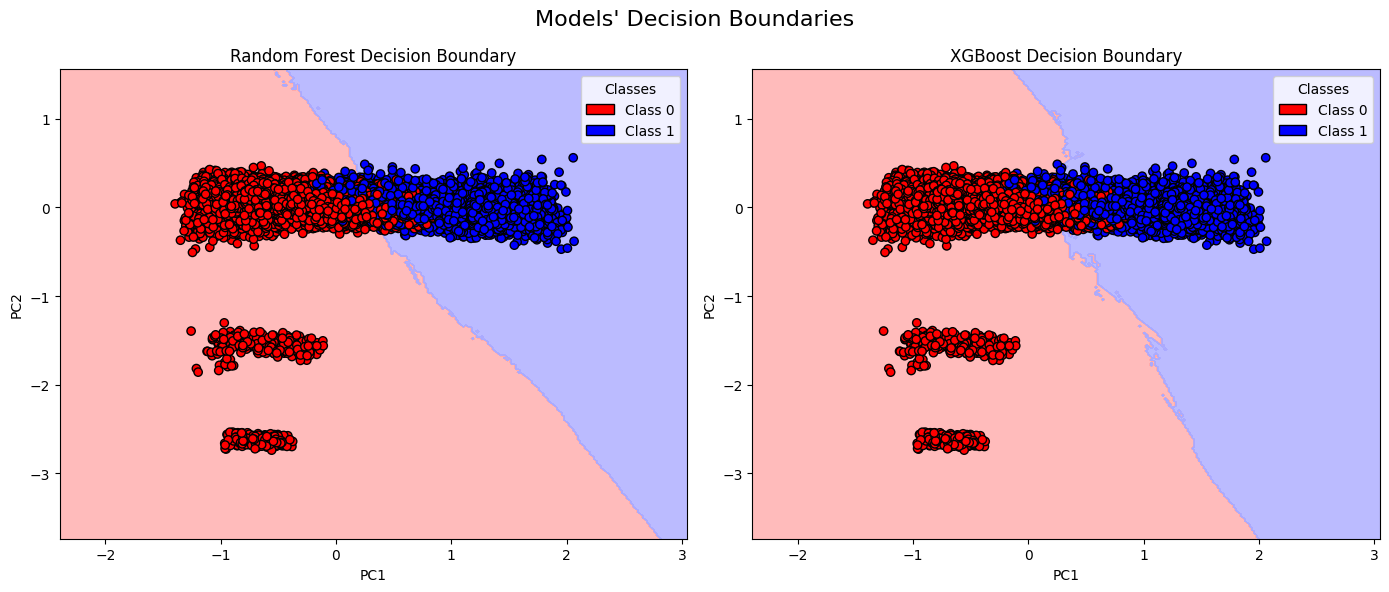

In [ ]:
# Reduce dimensions using PCA for decision boundary visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

# Plotting decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_boundary(rf_clf_model, X_reduced, y_train, "Random Forest Decision Boundary", axes[0])
plot_decision_boundary(xgb_clf_model, X_reduced, y_train, "XGBoost Decision Boundary", axes[1])

# # Add legend
# axes[0].legend(handles=axes[0].collections, labels=["Class 0", "Class 1"])
# axes[1].legend(handles=axes[1].collections, labels=["Class 0", "Class 1"])

# Set figure title
fig.suptitle("Models' Decision Boundaries", fontsize=16)

plt.tight_layout()
plt.show()

#### Feature Importance

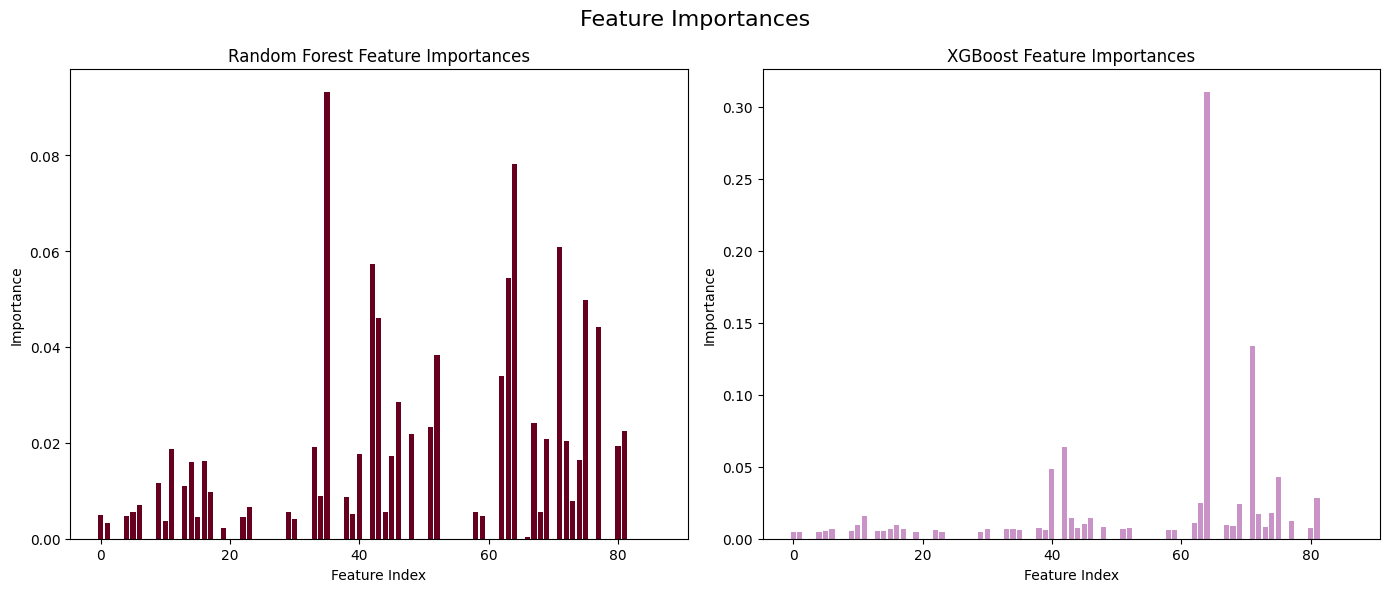

In [ ]:
# Plotting feature importances
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Random Forest Feature Importances
rf_importances = rf_clf_model.feature_importances_
axes[0].bar(range(len(rf_importances)), rf_importances, color="#67001F")
axes[0].set_title("Random Forest Feature Importances")
axes[0].set_xlabel("Feature Index")
axes[0].set_ylabel("Importance")

# XGBoost Feature Importances
xgb_importances = xgb_clf_model.feature_importances_
axes[1].bar(range(len(xgb_importances)), xgb_importances, color='#C993C7')
axes[1].set_title("XGBoost Feature Importances")
axes[1].set_xlabel("Feature Index")
axes[1].set_ylabel("Importance")

fig.suptitle("Feature Importances", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
rf_top_features = X_train.columns[np.argsort(rf_importances)[::-1][:5]].tolist()
rf_top_features

['sensor_measurement_4_rolling_mean_3',
 'sensor_measurement_4_rolling_mean_5',
 'sensor_measurement_11_rolling_mean_5',
 'sensor_measurement_11_rolling_mean_3',
 'sensor_measurement_3_rolling_mean_5']

In [ ]:
xgb_top_features = X_train.columns[np.argsort(xgb_importances)[::-1][:5]].tolist()
xgb_top_features

['sensor_measurement_4_rolling_mean_5',
 'sensor_measurement_11_rolling_mean_5',
 'sensor_measurement_11_rolling_mean_3',
 'sensor_measurement_9_rolling_mean_3',
 'sensor_measurement_15_rolling_mean_5']

In [ ]:
pd.DataFrame({
    "Random Forest": rf_top_features,
    "XGBoost": xgb_top_features
})

,Random Forest,XGBoost
0,sensor_measurement_4_rolling_mean_3,sensor_measurement_4_rolling_mean_5
1,sensor_measurement_4_rolling_mean_5,sensor_measurement_11_rolling_mean_5
2,sensor_measurement_11_rolling_mean_5,sensor_measurement_11_rolling_mean_3
3,sensor_measurement_11_rolling_mean_3,sensor_measurement_9_rolling_mean_3
4,sensor_measurement_3_rolling_mean_5,sensor_measurement_15_rolling_mean_5


Only `sensor_measurement_4_rolling_mean_5`, `sensor_measurement_11_rolling_mean_5` and `sensor_measurement_11_rolling_mean_3` are common features between the two models. The order is the same within both models, except that Radnom Forest holds `sensor_measurement_4_rolling_mean_3` to higher regards than the previously mentionned features.

#### Confusion Matrix

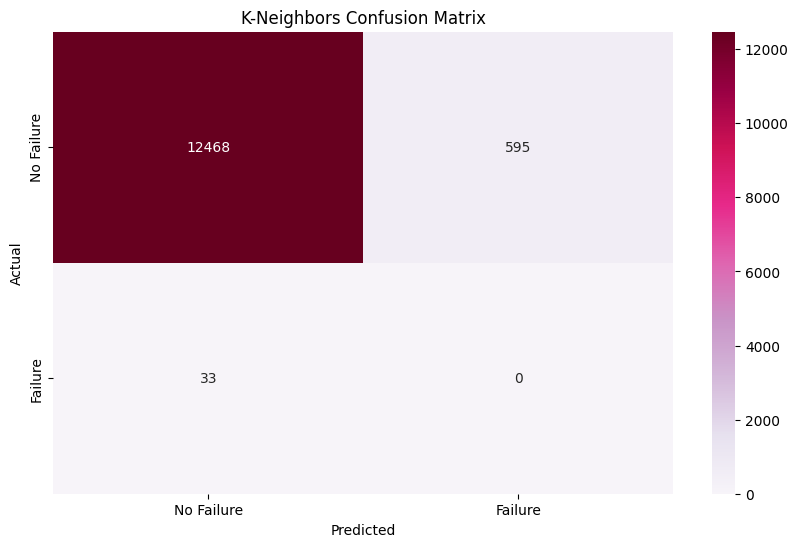

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_val, tpot_preds), annot=True, fmt='d', cmap='PuRd',
            xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('K-Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix for the K-Neighbors model provides insights into its classification performance. The matrix consists of four key values:

- **True Negatives (12468)**: These represent instances where the model correctly identified "No Failure." This high number indicates that the model is effective at predicting the majority class, which is consistent with the class imbalance in the dataset.

- **False Positives (595)**: These represent instances where the model incorrectly predicted "Failure" for cases that were actually "No Failure." While the number of false positives is relatively low compared to true negatives, it reflects some misclassification in the majority class.

- **False Negatives (33)**: These represent instances where the model failed to identify "Failure" and instead predicted "No Failure." This is a critical metric, as missing failure predictions can have significant operational consequences.

- **True Positives (0)**: The model completely failed to correctly identify any "Failure" instances, highlighting a major limitation in its ability to detect the minority class.

**Observations**
- **High True Negatives**: The model is highly effective at identifying the majority class, "No Failure," which is expected given the class imbalance in the dataset.
- **Zero True Positives**: The complete absence of correct "Failure" predictions indicates that the K-Neighbors model struggles to detect the minority class. This could be due to its sensitivity to class imbalance, as it relies on majority voting from nearest neighbors.
- **Imbalanced Performance**: The model demonstrates a bias toward the majority class, prioritizing accuracy over sensitivity to minority class predictions.

#### Maintenance Schedules

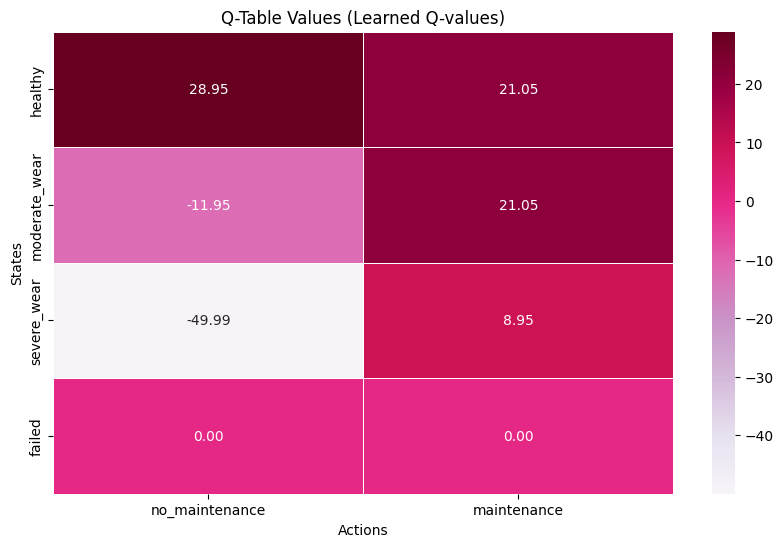

In [ ]:
# Visualize the learned Q-values

plt.figure(figsize=(10, 6))
sns.heatmap(q_table, fmt=".2f", annot=True, cmap='PuRd', linewidths=0.5, xticklabels=actions, yticklabels=states)
plt.title('Q-Table Values (Learned Q-values)')
plt.xlabel('Actions')
plt.ylabel('States')
plt.show()

1. **Observations**
  - **States and Actions**:
    - The rows represent the states (`healthy`, `moderate_wear`, `severe_wear`, `failed`).
    - The columns represent the actions (`no_maintenance`, `maintenance`).
    
  - **Healthy State**:\
    The highest Q-value is for `no_maintenance` in the `healthy` state (`28.95`), which indicates the optimal action is to avoid unnecessary maintenance when the system is healthy.

  - **Moderate Wear State**:\
    The Q-value for `maintenance` (`21.05`) is higher than for `no_maintenance` (`-11.95`), suggesting that performing maintenance is more beneficial in this state to prevent further degradation.

  - **Severe Wear State**:\
    The Q-value for `maintenance` (`8.95`) is higher than for `no_maintenance` (`-50.00`), indicating that immediate maintenance is critical in this state to avoid failure.

  - **Failed State**:\
    Both actions (`no_maintenance` and `maintenance`) have a Q-value of `0.00`, reflecting that no further action can improve the situation once the system has failed.

2. **Insights**
  - **Optimal Policy**:
    The learned Q-values reinforce a logical maintenance policy:
    1. Avoid maintenance in the healthy state.
    2. Perform maintenance in the moderate_wear and severe_wear states to prevent failure.
    3. In the failed state, no action is beneficial since the system cannot recover.

  - **Rewards and Decision Making**:
    The Q-values align with the reward structure defined in the reinforcement learning environment. Higher penalties for failure and moderate penalties for maintenance drive the system to prioritize maintenance only when necessary.

  - **Cost-Efficiency**:
    The policy balances the cost of maintenance and the risk of failure, ensuring minimal downtime while avoiding unnecessary maintenance.

In [ ]:
# Calculate average reward per hundred episodes
rewards_per_hundred_episodes = np.split(np.array(reward_all_episodes), num_episodes / 100)
rewards_avg = [np.mean(r) for r in rewards_per_hundred_episodes]

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Episodes (x100)': range(1, len(rewards_avg) + 1),
    'Average Reward': rewards_avg
})

# Plot using Plotly Express
fig = px.line(data, x='Episodes (x100)', y='Average Reward',
              title='Average Reward per 100 Episodes',
              labels={'Episodes (x100)': 'Episodes (x100)', 'Average Reward': 'Average Reward'},
              color_discrete_sequence=["#9500c3"])

fig.show()


1. **Initial Learning Phase (Episodes 1-3)**:\
    During the initial episodes, there is a steady increase in the average reward. This suggests that the Q-learning agent is starting to explore the environment and is making gradual improvements to its policy. The rise indicates that the agent is successfully identifying actions that lead to better outcomes.

2. **Mid-Learning Phase (Episodes 4-6)**:\
    In the middle episodes, there is a consistent increase in the rewards, peaking around episode 5. This implies that the agent is optimizing its policy and learning effective maintenance decisions. This phase shows a strong understanding of the environment and reward structure.

3. **Late Learning Phase (Episodes 7-10)**:\
    Toward the later episodes, the rewards fluctuate slightly but show a general stabilization. The slight decrease after episode 6 could indicate that the agent is encountering edge cases or noise in the environment. However, the overall reward trend remains high, showing that the policy is robust and nearing convergence.

This plot reflects the Q-learning algorithm’s success in improving the maintenance policy over time. The fluctuations in the late episodes are minor and likely a result of continued exploration. The upward trend and stabilization are strong indicators of a well-learned policy that balances maintenance costs and failures effectively.